# Machine Learning Practice Case

### Retno Dewi Yulianti
Data Fellowship Batch 6 - Data Science

## Data Understanding

In [195]:
# Import function that will use for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
# Importing Dataset

dataML = pd.read_csv("Ml_2_fellow.csv", encoding= 'unicode_escape')
dataML.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [197]:
minuscount = dataML[dataML["Jumlah"] < 0]
minuscount

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1.0,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [198]:
minusprice = dataML[dataML["Harga_Satuan"] <= 0]
minusprice

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1.0,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1.0,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1.0,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1.0,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27.0,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240.0,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300.0,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20.0,12/8/2011 14:06,0.0,NaN,United Kingdom


#### Because there are transactions that have record count less than 0 (minus) that might be coming from 'return product', 'discount', 'bonus', etc, then we should drop this to make better analysis. And the transactions also have price that have less than or equals to zero because of 'adjust bad debt' and 'discount product', so we need to delete that rows too.

In [199]:
# Drop rows that have minus count

dataML_clean = dataML[dataML.Jumlah > 0]

In [200]:
# Drop rows that have minus price

dataML_clean = dataML_clean[dataML_clean.Harga_Satuan > 0]

In [201]:
# Drop rows "adjust bad debt"

dataML_clean = dataML_clean[dataML_clean.Barang != "Adjust bad debt"]

In [202]:
dataML_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524152 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         524152 non-null  object 
 1   Kode_Barang        524152 non-null  object 
 2   Barang             524152 non-null  object 
 3   Jumlah             524152 non-null  float64
 4   Tanggal_Transaksi  524152 non-null  object 
 5   Harga_Satuan       524152 non-null  float64
 6   Kode_Pelanggan     394303 non-null  float64
 7   Negara             524152 non-null  object 
dtypes: float64(3), object(5)
memory usage: 36.0+ MB


## Detecting Missing Values

In [203]:
dataML_clean.isnull().sum()

Kode_Bayar                0
Kode_Barang               0
Barang                    0
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       129849
Negara                    0
dtype: int64

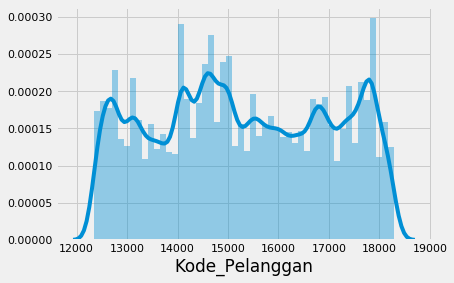

In [204]:
sns.distplot(dataML_clean["Kode_Pelanggan"])
plt.show()

In [205]:
# Imputing Missing Values for numerical data type, using mean for data with normal distribution and using median for data with skewness

dataML_clean['Kode_Pelanggan'] = dataML_clean['Kode_Pelanggan'].fillna(dataML_clean['Kode_Pelanggan'].median())

In [206]:
dataML_clean.isnull().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

In [207]:
dataML_clean.describe(include = "all")

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
count,524152,524152,524152,524152.000000,524152,524152.000000,524152.000000,524152
unique,19947,3834,3919,NaN,18488,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1101,2265,2323,NaN,1101,NaN,NaN,479442
mean,NaN,NaN,NaN,10.393353,NaN,3.904242,15260.882864,NaN
std,NaN,NaN,NaN,109.240547,NaN,32.728166,1487.393524,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,14375.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.100000,15159.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16271.000000,NaN


## 1.	What items customers buy the most and are there any items we should ignore?

In [208]:
# Best Seller Items 

bestseller = dataML_clean.groupby(['Barang']).agg({'Jumlah':np.sum}).reset_index() \
          .sort_values(['Jumlah'], ascending=[0]).groupby('Barang').head(1)
bestseller.head()

,Barang,Jumlah
1978,MEDIUM CERAMIC TOP STORAGE JAR,78033.0
3829,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047.0
1771,JUMBO BAG RED RETROSPOT,48474.0
3740,WHITE HANGING HEART T-LIGHT HOLDER,37891.0
2598,POPCORN HOLDER,36761.0


##### Based on the total pf record count (Jumlah) of each items, we know that "Medium Ceramic Top Storage Jar" was the most purchased product in this retail store.

In [209]:
minusprice = dataML[dataML["Harga_Satuan"] <= 0]
minusprice.head(5)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1.0,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1.0,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1.0,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1.0,12/1/2010 14:34,0.0,NaN,United Kingdom


In [210]:
minuscount = dataML[dataML["Jumlah"] < 0]
minuscount.head(5)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom


#### As I have mentioned above, the items that we should ignore are the items that have minus price and the items with minus count as those were "adjust bad debt" , or might be 'return', 'discount', 'bonus', 'promo' products. It should be applying since we want to make better analysis. On other hand, the minus price and items doesn't imply directly to customer segmentation. 

## 2.	What is our strategy to increase sales based on our export destination countries?

In [211]:
# Best Seller in Each Country

bestseller_country = dataML_clean.groupby(['Negara', 'Barang']).agg({'Jumlah':np.max}).reset_index() \
          .sort_values(['Negara', 'Jumlah'], ascending=[1, 0]).groupby('Negara').head(1)
bestseller_country.index = np.arange(1, len(bestseller_country)+1)
bestseller_country

,Negara,Barang,Jumlah
1,Australia,MINI PAINT SET VINTAGE,1152.0
2,Austria,SET 12 KIDS COLOUR CHALK STICKS,288.0
3,Bahrain,ICE CREAM SUNDAE LIP GLOSS,96.0
4,Belgium,FAIRY CAKES NOTEBOOK A7 SIZE,272.0
5,Brazil,DOLLY GIRL LUNCH BOX,24.0
6,Canada,RETRO COFFEE MUGS ASSORTED,504.0
7,Channel Islands,RAIN PONCHO,407.0
8,Cyprus,BOYS ALPHABET IRON ON PATCHES,288.0
9,Czech Republic,WOODEN STAR CHRISTMAS SCANDINAVIAN,72.0
10,Denmark,SET OF 12 MINI LOAF BAKING CASES,256.0


In [212]:
# Sum GTV (Gross Transaction Value)
# Adding new column of GTV

dataML_clean['GTV'] = dataML_clean['Jumlah'] * dataML_clean['Harga_Satuan']

In [213]:
# Best GTV

bestGTV_country = dataML_clean.groupby(['Negara', 'Barang']).agg({'GTV':np.max}).reset_index() \
          .sort_values(['GTV'], ascending=[0]).groupby('Negara').head(1)
bestGTV_country.index = np.arange(1, len(bestseller_country)+1)
bestGTV_country

,Negara,Barang,GTV
1,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,77183.60
2,Netherlands,RABBIT NIGHT LIGHT,4992.00
3,France,Manual,4161.06
4,Singapore,Manual,3949.32
5,Japan,ROUND SNACK BOXES SET OF 4 FRUITS,3794.40
6,Hong Kong,Manual,2653.95
7,EIRE,RED RETROSPOT CAKE STAND,2365.20
8,Australia,RABBIT NIGHT LIGHT,1718.40
9,Spain,CHILDRENS CUTLERY POLKADOT PINK,1350.00
10,Portugal,Manual,1241.98


In [214]:
# Our strategy to increase sales by sorting the items that have highest GTV & record count in entire countries
highestdata = dataML_clean.groupby(['Negara', 'Barang']).agg({'GTV':np.max, 'Jumlah':np.max}).reset_index() \
          .sort_values(['GTV', 'Jumlah'], ascending=[0, 0]).groupby('Negara').head(1)
highestdata.index = np.arange(1, len(highestdata)+1)
highestdata

,Negara,Barang,GTV,Jumlah
1,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,77183.60,74215.0
2,Netherlands,RABBIT NIGHT LIGHT,4992.00,2400.0
3,France,Manual,4161.06,2.0
4,Singapore,Manual,3949.32,1.0
5,Japan,ROUND SNACK BOXES SET OF 4 FRUITS,3794.40,1488.0
6,Hong Kong,Manual,2653.95,1.0
7,EIRE,RED RETROSPOT CAKE STAND,2365.20,216.0
8,Australia,RABBIT NIGHT LIGHT,1718.40,960.0
9,Spain,CHILDRENS CUTLERY POLKADOT BLUE,1350.00,360.0
10,Portugal,Manual,1241.98,2.0


### OUR STRATEGIES

Since we know that GMV/GTV is a good indicator of the growth of the company, as this measures the volume and value of merchandise sold or the number of transactions handled, we can consider the "items / Barang" that have biggest values in "GTV" and "Record Count/Jumlah". Then, we can bring more focus on sales of those items as long as it gives big contribution to our GTV. 

(Source: https://economictimes.indiatimes.com/industry/services/retail/all-you-want-to-know-about-gross-merchandise-value/articleshow/33361672.cms?from=mdr)

## 3.	Do customer segmentation appropriately. Please explain in detail and completely.

In [215]:
# Use numerical values only as input variable
# Jumlah, Harga Satuan & Kode Pelanggan
# We want to clustering the customer by identifying their characteristic and also their pattern of buying product

#### Principal Component Analysis (PCA)

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [217]:
# Create data for clustering by Order ID (Kode Bayar)

data_cluster = dataML_clean.groupby('Kode_Bayar', as_index=False).sum()
data_cluster.index = np.arange(1, len(data_cluster)+1)
data_cluster

,Kode_Bayar,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV
1,536365,40.0,27.37,124950.0,139.12
2,536366,12.0,3.70,35700.0,22.20
3,536367,83.0,58.24,156564.0,278.73
4,536368,15.0,19.10,52188.0,70.05
5,536369,3.0,5.95,13047.0,17.85
...,...,...,...,...,...
19943,581583,76.0,3.30,27554.0,124.60
19944,581584,120.0,2.57,27554.0,140.64
19945,581585,278.0,37.78,331884.0,329.05
19946,581586,66.0,20.23,52452.0,339.20


In [218]:
dataML_1 = np.array([data_cluster['Jumlah'], data_cluster['Harga_Satuan']])
dataML_1.shape

(2, 19947)

In [219]:
dataML_t=dataML_1.transpose()
dataML_t.shape

(19947, 2)

#### Standardize The Data

In [220]:
dataML_std=StandardScaler().fit_transform(dataML_t)
dataML_std

array([[-0.30586967, -0.25044561],
       [-0.34260942, -0.32925225],
       [-0.24944792, -0.14766737],
       ...,
       [ 0.00641819, -0.21578667],
       [-0.27175419, -0.27421745],
       [-0.22058097, -0.19341318]])

#### Feature Selection

In [221]:
pca=PCA(n_components=0.8,whiten=True)
dataML_pca=pca.fit_transform(dataML_std)

In [222]:
print('Original number of features:', dataML_std.shape[1])
print('Reduced number of features:', dataML_pca.shape[1])

Original number of features: 2
Reduced number of features: 2


In [223]:
#PCA with Feature Selection
data_pca=pd.DataFrame(dataML_pca, columns=["PC1","PC2"])
data_pca

,PC1,PC2
0,-0.372122,-0.041715
1,-0.449412,-0.010053
2,-0.265633,-0.076606
3,-0.412483,-0.045681
4,-0.452301,-0.024580
...,...,...
19942,-0.394131,0.054155
19943,-0.357138,0.099438
19944,-0.140048,0.167245
19945,-0.365204,0.001854


#### Feature Extraction

In [224]:
#Feature Extraction
from sklearn import decomposition

In [225]:
pca2 = decomposition.PCA(n_components=2)
dataML_pca2 = pca2.fit_transform(dataML_std)

In [226]:
print('Original number of features:',dataML_std.shape[1])
print('Reduced number of features:', dataML_pca2.shape[1])

Original number of features: 2
Reduced number of features: 2


In [227]:
#PCA with Feature Extraction
data2_pca=pd.DataFrame(dataML_pca2, columns=["PC1","PC2"])
data2_pca

,PC1,PC2
0,-0.393374,-0.039191
1,-0.475078,-0.009445
2,-0.280803,-0.071970
3,-0.436039,-0.042917
4,-0.478131,-0.023092
...,...,...
19942,-0.416639,0.050877
19943,-0.377534,0.093420
19944,-0.148046,0.157123
19945,-0.386060,0.001742


### K-Means Clustering

In [228]:
import numpy as np
from numpy.linalg import norm

In [229]:
class Kmeans:
'''Implementing Kmeans algorithm.'''
def __init__(self, n_clusters, max_iter=100, random_state=123):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.random_state = random_state
def initializ_centroids(self, X):
    np.random.RandomState(self.random_state)
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:self.n_clusters]]
    return centroids
def compute_centroids(self, X, labels):
    centroids = np.zeros((self.n_clusters, X.shape[1]))
    for k in range(self.n_clusters):
        centroids[k, :] = np.mean(X[labels == k, :], axis=0)
    return centroids
def compute_distance(self, X, centroids):
    distance = np.zeros((X.shape[0], self.n_clusters))
    for k in range(self.n_clusters):
        row_norm = norm(X - centroids[k, :], axis=1)
        distance[:, k] = np.square(row_norm)
    return distance
def find_closest_cluster(self, distance):
    return np.argmin(distance, axis=1)
def compute_sse(self, X, labels, centroids):
    distance = np.zeros(X.shape[0])
    for k in range(self.n_clusters):
        distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
    return np.sum(np.square(distance))
def fit(self, X):
    self.centroids = self.initializ_centroids(X)
    for i in range(self.max_iter):
        old_centroids = self.centroids
        distance = self.compute_distance(X, old_centroids)
        self.labels = self.find_closest_cluster(distance)
        self.centroids = self.compute_centroids(X, self.labels)
        if np.all(old_centroids == self.centroids):
            break
        self.error = self.compute_sse(X, self.labels, self.centroids)
def predict(self, X):
    distance = self.compute_distance(X, old_centroids)
    return self.find_closest_cluster(distance)

IndentationError: expected an indented block (<ipython-input-229-a51876de0176>, line 2)

In [230]:
print(data2_pca.shape)

(19947, 2)


In [231]:
data2_pca.head()

,PC1,PC2
0,-0.393374,-0.039191
1,-0.475078,-0.009445
2,-0.280803,-0.071970
3,-0.436039,-0.042917
4,-0.478131,-0.023092


In [232]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,make_circles, make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

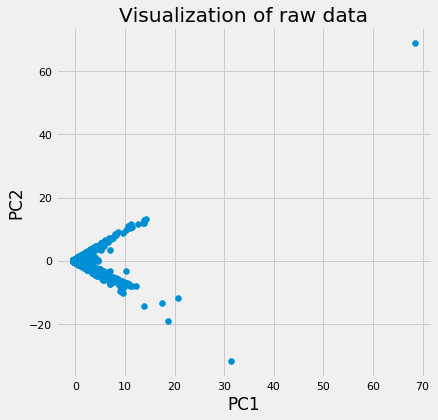

In [233]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(data2_pca.iloc[:, 0], data2_pca.iloc[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of raw data');

In [234]:
# Standardize the data
X_std = StandardScaler().fit_transform(data2_pca)
X_std

array([[-0.37213181, -0.04171647],
       [-0.44942338, -0.01005365],
       [-0.26563935, -0.07660798],
       ...,
       [-0.14005129,  0.1672487 ],
       [-0.36521271,  0.00185404],
       [-0.27693   , -0.0204486 ]])

In [235]:
# Run local implementation of kmeans
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_

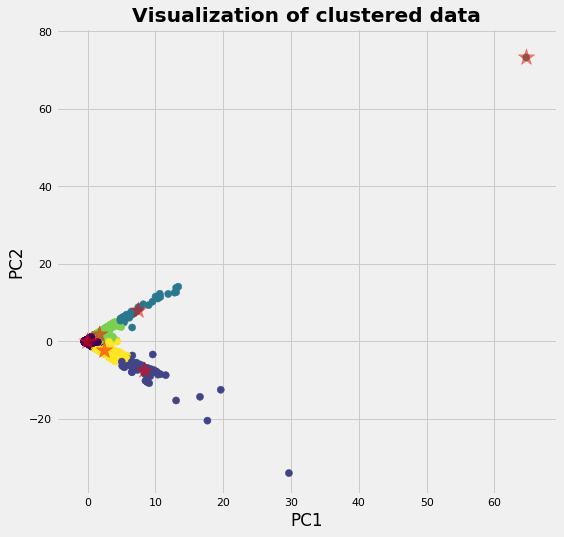

In [236]:
from sklearn.cluster import KMeans
fig, ax = plt.subplots(figsize=(8, 8))

kmeans = KMeans(n_clusters=6, max_iter=100)
kmeans.fit(X_std)
y_kmeans = kmeans.predict(X_std)

plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=300, alpha=0.5, label='centroid');

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of clustered data', fontweight='bold')
plt.show()

In [237]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [238]:
df1=pd.DataFrame(y_kmeans, columns=['Predicted_Cluster'])
print(df1)

       Predicted_Cluster
0                      0
1                      0
2                      0
3                      0
4                      0
...                  ...
19942                  0
19943                  0
19944                  0
19945                  0
19946                  0

[19947 rows x 1 columns]


In [239]:
data_cluster.insert(5, "Predicted_Cluster", df1)

In [240]:
data_cluster

,Kode_Bayar,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV,Predicted_Cluster
1,536365,40.0,27.37,124950.0,139.12,0.0
2,536366,12.0,3.70,35700.0,22.20,0.0
3,536367,83.0,58.24,156564.0,278.73,0.0
4,536368,15.0,19.10,52188.0,70.05,0.0
5,536369,3.0,5.95,13047.0,17.85,0.0
...,...,...,...,...,...,...
19943,581583,76.0,3.30,27554.0,124.60,0.0
19944,581584,120.0,2.57,27554.0,140.64,0.0
19945,581585,278.0,37.78,331884.0,329.05,0.0
19946,581586,66.0,20.23,52452.0,339.20,0.0


#### Model Evaluation

source: https://realpython.com/k-means-clustering-python/

In [139]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [241]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [242]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)

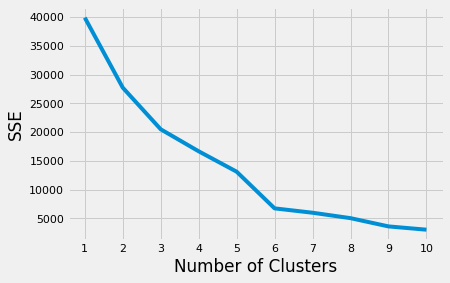

In [243]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [244]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

6

Based on that Elbow plot, we can conclude that the best cluster for this data is 6 (six) as same as the total cluster in our K-means clustering result.

#### Analyzing The Characteristic of Each Cluster

In [245]:
cluster = data_cluster.groupby('Predicted_Cluster')
cluster.first()

,Kode_Bayar,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV
Predicted_Cluster,,,,,
0.0,536365,40.0,27.37,124950.0,139.12
1.0,536542,392.0,31.45,263296.0,787.40
2.0,539730,85.0,38.65,148357.0,193.15
3.0,541430,1216.0,114.18,444816.0,2271.62
4.0,536386,236.0,8.25,48087.0,508.20
5.0,536861,79.0,49.25,124270.0,303.50


In [246]:
cluster_0 = cluster.get_group(0)
cluster_1 = cluster.get_group(1)
cluster_2 = cluster.get_group(2)
cluster_3 = cluster.get_group(3)
cluster_4 = cluster.get_group(4)
cluster_5 = cluster.get_group(5)

In [247]:
# Count the total members of each cluster

print("The total member(s) in cluster 0 are ", len(cluster_0.index))
print("The total member(s) in cluster 1 are ", len(cluster_1.index))
print("The total member(s) in cluster 2 are ", len(cluster_2.index))
print("The total member(s) in cluster 3 are ", len(cluster_3.index))
print("The total member(s) in cluster 4 are ", len(cluster_4.index))
print("The total member(s) in cluster 5 are ", len(cluster_5.index))

The total member(s) in cluster 0 are  18998
The total member(s) in cluster 1 are  90
The total member(s) in cluster 2 are  40
The total member(s) in cluster 3 are  1
The total member(s) in cluster 4 are  395
The total member(s) in cluster 5 are  422


In [248]:
cluster_0.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV
count,18998.000000,18998.000000,1.899800e+04,18998.000000
mean,270.610485,97.631869,3.885544e+05,509.886335
std,769.420342,290.304253,6.733281e+05,1288.569219
min,1.000000,0.060000,1.234600e+04,0.380000
25%,69.000000,18.210000,9.329250e+04,151.005000
50%,150.000000,44.900000,2.289880e+05,301.555000
75%,290.000000,88.607500,4.351350e+05,486.982500
max,74215.000000,13541.330000,1.669006e+07,77183.600000


In [249]:
cluster_1.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV
count,90.000000,90.00000,9.000000e+01,90.000000
mean,257.800000,218.36000,7.235816e+05,648.929000
std,359.111613,677.45815,1.784424e+06,1269.117636
min,1.000000,0.95000,1.243300e+04,1.900000
25%,65.000000,20.80750,1.014090e+05,180.467500
50%,130.500000,45.35000,2.317605e+05,299.270000
75%,347.500000,116.29500,5.331190e+05,460.017500
max,2443.000000,4422.27000,1.085384e+07,9008.000000


In [250]:
cluster_2.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV
count,40.000000,40.000000,4.000000e+01,40.000000
mean,313.475000,122.875750,5.138004e+05,627.931750
std,506.232387,267.027569,9.421334e+05,932.352549
min,1.000000,0.420000,1.390000e+04,8.500000
25%,84.250000,17.487500,8.096075e+04,201.847500
50%,206.500000,52.235000,2.199970e+05,352.640000
75%,291.250000,120.685000,5.362845e+05,478.190000
max,3012.000000,1595.600000,5.684625e+06,4853.810000


In [251]:
cluster_3.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV
count,1.0,1.00,1.0,1.00
mean,1216.0,114.18,444816.0,2271.62
std,NaN,NaN,NaN,NaN
min,1216.0,114.18,444816.0,2271.62
25%,1216.0,114.18,444816.0,2271.62
50%,1216.0,114.18,444816.0,2271.62
75%,1216.0,114.18,444816.0,2271.62
max,1216.0,114.18,444816.0,2271.62


In [252]:
cluster_4.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV
count,395.000000,395.000000,3.950000e+02,395.000000
mean,373.146835,67.504177,3.232352e+05,692.400785
std,813.014188,97.873438,3.934633e+05,1605.294375
min,1.000000,0.210000,1.245200e+04,2.900000
25%,75.500000,17.190000,9.110200e+04,169.960000
50%,159.000000,45.170000,2.296190e+05,306.520000
75%,301.000000,84.675000,3.925755e+05,488.315000
max,8102.000000,1165.950000,4.578018e+06,13760.020000


In [253]:
cluster_5.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan,GTV
count,422.000000,422.000000,4.220000e+02,422.000000
mean,289.535545,332.265190,9.556363e+05,885.208246
std,352.163820,548.464433,1.492774e+06,2153.304608
min,1.000000,0.390000,1.241500e+04,0.850000
25%,71.000000,23.970000,1.058085e+05,178.957500
50%,181.500000,65.420000,3.229485e+05,398.540000
75%,380.250000,450.990000,9.442118e+05,1157.892500
max,2924.000000,4037.770000,9.156036e+06,38970.000000


## 4.	Get the hidden insight from the data

#### List Unique Items

In [254]:
list_unique_items = list(dataML_clean["Barang"].unique())
len(list_unique_items)

3919

There are 3919 names of items that available in our store and here are the details.

#### List Unique Customer ID

In [256]:
list_unique_cust = list(dataML_clean["Kode_Pelanggan"].unique())
len(list_unique_cust)

4336

In [258]:
datacustomer = dataML_clean.groupby(['Negara', 'Kode_Pelanggan']).count()
datacustomer

Kode_Bayar  Kode_Barang  Barang  Jumlah  \
Negara      Kode_Pelanggan                                            
Australia   12386.0                 10           10      10      10   
            12388.0                100          100     100     100   
            12393.0                 63           63      63      63   
            12415.0                708          708     708     708   
            12422.0                 21           21      21      21   
...                                ...          ...     ...     ...   
Unspecified 12363.0                 23           23      23      23   
            12743.0                132          132     132     132   
            14265.0                 31           31      31      31   
            15159.0                202          202     202     202   
            16320.0                 56           56      56      56   

                            Tanggal_Transaksi  Harga_Satuan  GTV  
Negara      Kode_Pelanggan                                        
Australia   12386.0                        10            10   10  
            12388.0                       100           100  100  
            12393.0                        63            63   63  
            12415.0                       708           708  708  
            12422.0                        21            21   21  
...                                       ...           ...  ...  
Unspecified 12363.0                        23            23   23  
            12743.0                       132           132  132  
            14265.0                        31            31   31  
            15159.0                       202           202  202  
            16320.0                        56            56   56  

[4352 rows x 7 columns]

There are 4336 unique customer's ID that different for all countries except 16 cust ID's that might same for some countries. It will beneficial to get an insight at clustering.

#### Trend Sales by Date 

In [259]:
dataML_clean['date'] = pd.DatetimeIndex(dataML_clean['Tanggal_Transaksi']).date

In [260]:
dataML_clean['date'] = pd.to_datetime(dataML_clean['date'], errors='coerce').dt.strftime('%Y-%m')

In [261]:
dataML_clean['date'] = pd.to_datetime(dataML_clean['date'])

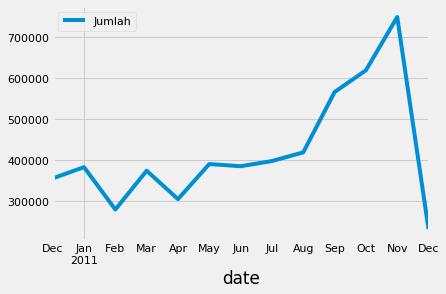

In [262]:
datasales = dataML_clean[['date','Jumlah']]
datasales.groupby(['date']).sum().plot(legend=True)
plt.show()

#### The line plot above displays the sales trend from December 2010 - December 2011, the trend shows increases until November 2011 and significanly decreases on December 2011.

#### Visualize The Pattern of Items Based on Each Price

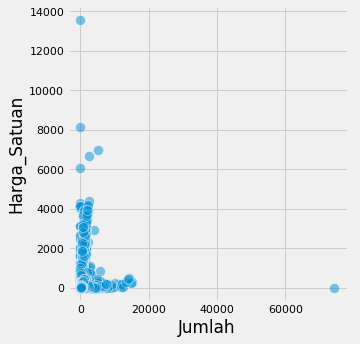

In [263]:
pal = dict(Lunch="seagreen", Dinner=".7")
g = sns.FacetGrid(data_cluster, palette=pal, height=5)
g.map(sns.scatterplot, "Jumlah", "Harga_Satuan", s=100, alpha=.5)
g.add_legend()
plt.show()

#### Regarding to the plot above, we can see that there are outliers data that makes the plot looks around zero, it's actually because the interval of the data is up to 4,000 for "Harga Satuan" and up to 20,000 for "Jumlah".